# Finite Element Methods

We use the linear finite element method for solving the Poisson equation as an example to explain the main ingredients of finite element methods. We recommend to read 

- [Introduction to Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch2FEM.pdf)
- [Progamming of Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch3FEMCode.pdf)

and do the following project
- [Projects: Linear Finite Element Methods](../project/projectFEM.html)

The numerical example using the linear element is in
- [Linear Element for Poisson Equation in 2D](Poissonfemrate.html)

and more elements and equations can be found
- [List of Examples](femexamplelist.html)


## Variational formulation

The classic formulation of the Poisson equation reads as

$$ - \Delta u = f  \text{ in }  \Omega, \qquad u  = g_D  \text{ on }
\Gamma _D,  \qquad  \nabla u\cdot n = g_N  \text{ on } \Gamma _N, $$

where $\partial \Omega = \Gamma _D\cup \Gamma _N$ and $\Gamma _D\cap \Gamma _N=\emptyset$. 
We assume $\Gamma _D$ is closed and $\Gamma _N$ open.

Denoted by $H_{g_D}^1(\Omega)=\{v\in L^2(\Omega), \nabla v\in L^2(\Omega) \text{ and } v|_{\Gamma _D} = g_D\}$. Multiplying the Poisson equation by a test function $v\in H_{0_D}^1$ and using integration by parts, we obtain the weak formulation of the Poisson equation: find $u\in H_{g_D}^1(\Omega)$ such that for all $v\in H_{0_D}^1$:

$$ 
a(u,v) := \int _{\Omega} \nabla u\cdot \nabla v\, {\rm dxdy} = \int _{\Omega} fv \, {\rm dxdy} + \int _{\Gamma _N} g_N v \,{\rm d}S.
$$

Let $\mathcal T$ be a triangulation of $\Omega$. We define the linear
finite element space on $\mathcal T$ as 

$$
\mathcal V_{\mathcal T} = \{v\in C(\bar \Omega) : v|_{\tau}\in \mathcal P_k, \forall \tau \in \mathcal T\}. 
$$

where $\mathcal P_k$ is the polynomial space with degree $\leq k$. 

The finite element method for solving the Poisson
equation is to find $u\in \mathcal V_{\mathcal T}\cap H_{g_D}^1(\Omega)$ 
such that for all $v\in \mathcal V_{\mathcal T}\cap H_{0_D}^1(\Omega)$:

$$
a(u,v) = \int _{\Omega} fv \, {\rm dxdy} + \int _{\Gamma _N} g_N v \,{\rm d}S.
$$

## Finite element space

We take linear finite element spaces as an example. For each vertex $v_i$ of $\mathcal T$, let $\phi _i$ be the piecewise linear function such that $\phi _i(v_i)=1$ and $\phi _i(v_j)=0$ when $j\neq i$. The basis function in 1-D and 2-D is illustrated below. It is also called hat function named after the shape of its graph.

Then it is easy to see $\mathcal V_{\mathcal T}$ is spanned by $\{\phi
_i\}_{i=1}^{N}$ and thus for a finite element function $v=\sum
_{i=1}^Nv_i\phi _i$.

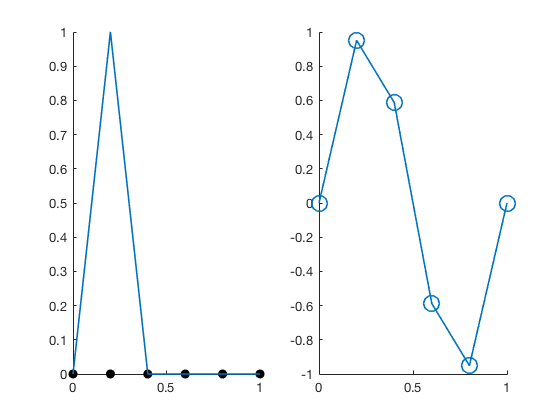

In [5]:
x = 0:1/5:1;
u = zeros(length(x),1);
u(2) = 1;
figure;
subplot(1,2,1); hold on; 
plot(x,0,'k.','MarkerSize',18); 
plot(x,u,'-','linewidth',1.2);
subplot(1,2,2); hold on;
u = sin(2*pi*x);
plot(x,u,'-o','linewidth',1.2,'MarkerSize',10);

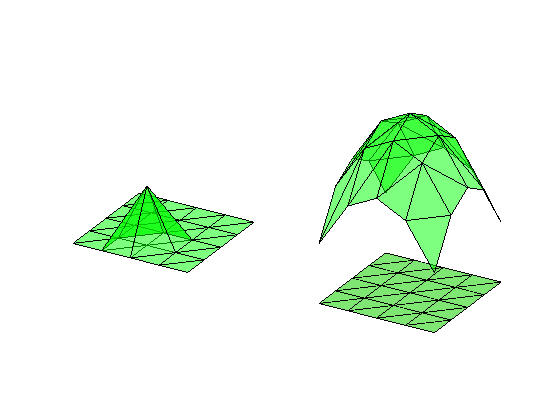

In [6]:
% 2-D hat basis
clf; 
[node,elem] = squaremesh([-1,1,-1,1],0.5);
phi = zeros(size(node,1),1);
phi(12) = 1;
subplot(1,2,1);
showmesh(node,elem,'facecolor','none'); hold on;
showsolution(node,elem,phi,[30,26],'facecolor','g','facealpha',0.5,'edgecolor','k');
u = 3-node(:,1).^2 - node(:,2).^2; % x^2 + y^2
% u = sin(node(:,1)).*cos(node(:,2));
subplot(1,2,2);
showmesh(node,elem); hold on;
showsolution(node,elem,u,[30,26],'facecolor','g','facealpha',0.5,'edgecolor','k');

## Linear Algebraic System

For any function $v\in V_{h}$, there is a unique representation: $v=\sum _{i=1}^Nv_i\phi _i$.  We thus can define an isomorphism $V_{h}\cong \mathbb R^N$ by

$$
v=\sum _{i=1}^Nv_i\phi _i \longleftrightarrow \boldsymbol  v=(v_1, \cdots, v_N)^{\intercal},
$$

and call $\boldsymbol  v$ the coordinate vector of $v$ relative to the basis $\{\phi _i\}_{i=1}^{N}$. Following the terminology in elasticity, we introduce the *stiffness matrix*

$$
\boldsymbol  A=(a_{ij})_{N\times N}, \, \text{ with } \quad a_{ij}=a(\phi _j,\phi _i),
$$

and the load vector $\boldsymbol  f=\{\langle f, \phi_k \rangle\}_{k=1}^{N}\in \mathbb{R}^{N}$. Then the coefficient vector can be obtained by solving the following linear algebraic system

$$
\boldsymbol  A\boldsymbol  u = \boldsymbol  f.
$$

It is straightforward to verify $\boldsymbol  A$ is a symmetric and positive definite (SPD) matrix and thus the solution $\boldsymbol  u$ exists and unique.

## Further reading

- Error estimate of the linear finite element method can be found in [Introduction to Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch2FEM.pdf)

- Assembling the matrix $\boldsymbol A$ and the vector $\boldsymbol f$ can be found in [Progamming of Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch3FEMCode.pdf)

- Fast solvers for solving the linear algebraic equation can be found in [Multigrid Methods](https://www.math.uci.edu/~chenlong/226/MGintroduction.pdf)